# Customer Segmentation on the Number of Mall Customers

## Author: Indrajit Nandi

In [1]:
# Importing the Dependencies
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
#Importing the data set
os.chdir('F:\Indrajit\DATA(.csv)')
d=pd.read_csv('Mall_Customers.csv')


In [3]:
#Creating a copy of the dataset
data=d.copy()

In [4]:
#Printing the head of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

- There are 200 rows and 5 columns in the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- There are 3 integer columns and one object column.

In [7]:
#Checking for the presence of missing values
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There are no missing values in the dataframe.

In [9]:
#Choosing the annual income column and spending score column
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
# Fitting the model
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


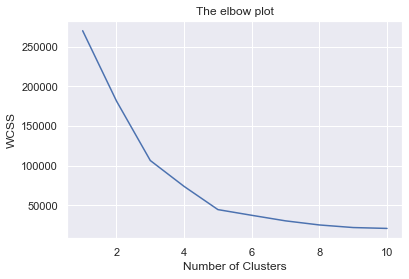

In [12]:
#Plotting an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

- We see that the optimum number of clusters is 5

In [13]:
#Training the model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [17]:
#Return a label for each data point based on their cluster
fitted_values=kmeans.fit_predict(x)
print(fitted_values)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


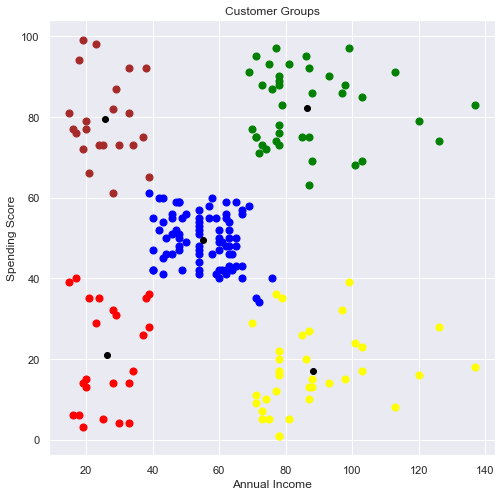

In [20]:
#Visualizing the clusters formed
plt.figure(figsize=(8,8))
plt.scatter(x[fitted_values==0,0],x[fitted_values==0,1],s=50,c='yellow',label='Cluster 1')
plt.scatter(x[fitted_values==1,0],x[fitted_values==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(x[fitted_values==2,0],x[fitted_values==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(x[fitted_values==3,0],x[fitted_values==3,1],s=50,c='brown',label='Cluster 4')
plt.scatter(x[fitted_values==4,0],x[fitted_values==4,1],s=50,c='red',label='Cluster 5')
#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label="Centroids")
plt.title('Customer Groups')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

- There are in total of 5 distinct clusters of mall customers with the centroid colored as black.

### Conclusions:

- The cluster marked with brown color have low annual income with high spending score.
- The cluster marked with green color have high annual income with high spending score.
- The cluster marked with blue color have mediaval annual income with mediaval spending score.
- The cluster marked with red color have low annual income with low spending score.
- The cluster marked with yellow color have high annual income with low spending score.